# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

Импортируем необходимые для работы бибилиотеки:

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.dummy import DummyClassifier

In [2]:
try:
    df = pd.read_csv('d:/users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

Приступаем к **EDA**:

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Пропусков в данных нет.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Тип данных в столбцу 'messages' представлен числами с плавающей точкой. Можно заменить на целочисленный тип, но думаю, что это некритично.

In [6]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Классы не сбалансированны. 

<AxesSubplot:>

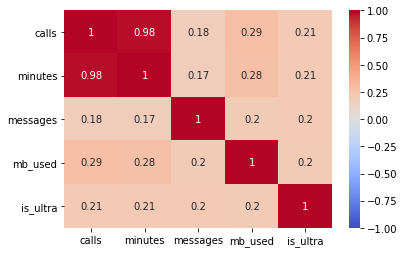

In [7]:
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

Для данных характерна мультиколлинеанарность. Значение 'calls' и 'minutes' почти линейно зависимы.

**Вывод:** данные нуждаются в дальнейше предобработке. Тем не менее, качество данных позволяет построить ту или иную модель обучения.

## Разбейте данные на выборки

**Разобьем данные на тестовую и валидационную выборки, а также выделим целевые признаки для обучения модели:**

In [8]:
df_train, df_test = train_test_split(df, test_size=0.4, random_state=12345)
features = df_test.drop(['is_ultra'], axis=1)
target = df_test['is_ultra']

In [9]:
features_valid, features_test, target_valid, target_test = train_test_split(features, target, 
                                                                            test_size=0.5, random_state=12345)

In [10]:
features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']

## Исследуйте модели

### Дерево решений

**Дерево решений**

In [12]:
max_depth = 0
best_result = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_result = result
        max_depth = depth
print(f'Максимальная глубина дерева: {max_depth}. Лучшая оценка: {best_result}')

Максимальная глубина дерева: 3. Лучшая оценка: 0.7853810264385692


### Случайный лес

In [29]:
max_depth = 0
max_result = 0
for sample in range(1,5):
    for depth in range(1,12):
        for est in range(1,11):
            model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, min_samples_leaf = sample)
            model.fit(features_train, target_train)
            result = model.score(features_valid, target_valid)
            if result > max_result:
                max_result = result
                max_depth = depth
                max_est = est 
                max_sample = sample
print(f'Максимальная глубина дерева: {max_depth}. Максимальное кол-во деревьев: {max_est}. Число объектов в листьях: {max_sample}. Лучшая оценка: {max_result}')

Максимальная глубина дерева: 8. Максимальное кол-во деревьев: 8. Число объектов в листьях: 1. Лучшая оценка: 0.80248833592535


### Логистическая регрессия

In [15]:
mx_iter = 0
max_result = 0
for iter in range(100, 1000, 50):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=iter)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > max_result:
        max_result = result
        mx_iter = iter
print(f'Кол-во повторений: {mx_iter}. Лучшая оценка: {max_result}.')

Кол-во повторений: 100. Лучшая оценка: 0.7107309486780715.


## Проверьте модель на тестовой выборке

### Дерево решений

In [16]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
score = model.score(features_test, target_test)
print(f'Оценка: {score}')

Оценка: 0.7807153965785381


### Случайный лес

In [18]:
model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=8, min_samples_leaf = 1)
model.fit(features_train, target_train)
score = model.score(features_test, target_test)
print(f'Оценка: {score}')

Оценка: 0.8009331259720062


### Логистическая регрессия

In [20]:
model = LogisticRegression(random_state=12345, solver='lbfgs') #по умолчанию max_iter = 100
model.fit(features_train, target_train)
score = model.score(features_test, target_test)
print(f'Оценка: {score}')

Оценка: 0.6842923794712286


In [24]:
best_tree_model = None
max_depth = 0
max_result = 0
for sample in range(1,5):
    for depth in range(1,11):
        for est in range(1,11):
            model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, min_samples_leaf = sample)
            model.fit(features_train, target_train)
            result = model.score(features_valid, target_valid)
            if result > max_result:
                max_result = result
                max_depth = depth
                max_est = est 
                max_sample = sample
                best_tree_model = model
print(best_tree_model)           

RandomForestClassifier(max_depth=8, n_estimators=8, random_state=12345)


In [30]:
model = RandomForestClassifier(random_state=12345, max_depth=8, n_estimators=8, min_samples_leaf = 1)
model.fit(features_train, target_train)
score = model.score(features_test, target_test)
print(f'Оценка: {score}')

Оценка: 0.7962674961119751


## (бонус) Проверьте модели на адекватность

In [21]:
dmb = DummyClassifier(random_state=12345, strategy='most_frequent') 
dmb.fit(features_train, target_train)                               
dmb_score = dmb.score(features_test, target_test)                   
print("Оценка:", dmb_score)                                         

Оценка: 0.6842923794712286


**Вывод:** лучшая оценка у модели `"случайный лес"`. 
Максимальный результат достигается при следующих значениях гиперпараметров:

* Максимальная глубина дерева = `8`
* Максимальное кол-во деревьев  = `8`
* Число объектов в листьях = `1`